In [3]:
import pandas as pd
import os
import seaborn as sns
from config import *
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix


In [28]:
list(filter(lambda x: os.path.isdir(x), os.listdir()))

['algorithm_classification_results_normalize_True',
 'algorithm_classification_ela_results_normalize_True',
 '.ipynb_checkpoints',
 'cmaes_classification',
 'problem_classification_results_x_y_normalize_False',
 '__pycache__',
 'ela_problem_classification_visualizations',
 'algorithm_classification_ela_results_normalize_False',
 'cmaes_ela_features',
 'algorithm_classification_ela_visualizations',
 'Environments',
 'algorithm_classification_results_normalize_False',
 'algorithm_run_data_normalized',
 'algorithm_run_data',
 '.git',
 'problem_classification_results_x_y_normalize_True',
 'iteration_ela',
 'problem_classification_ela_results_normalize_False',
 'performance prediction',
 'iteration_ela_normalized',
 'feature_visualizations',
 'problem_classification_results_normalize_True',
 'problem_classification_visualizations',
 'problem_classification_ela_results_normalize_True',
 'problem_classification_results_normalize_False',
 'algorithm_classification_visualizations']

In [4]:
result_dir='problem_classification_results'
seeds=[200,400,600,800,1000]
visualizations_dir='problem_classification_visualizations'
train_on_seed=True
difference=False

seed_mapping={index:seed for index,seed in enumerate(seeds)}

In [5]:
os.makedirs(visualizations_dir,exist_ok=True)

In [6]:
all_algorithms=['DE','ES','PSO']
all_stats=['min','max','mean','std']
all_dimensions=[3,5,10,20]

In [7]:
def get_global_file_name(dimension,algorithms, iteration_start,iteration_end, train_on_seed,seed, difference,stat=None, normalize_y=False):
    
    file_name=f'dim_{dimension}_{algorithms}_it_{iteration_start}-{iteration_end}_instance_count_100_{"train" if train_on_seed else "test"}_on_seed_{seed}{"_differenced" if difference else ""}'
    if stat is None:
        return os.path.join(result_dir + f'_normalize_{normalize_y}' ,file_name)
    else:
        return os.path.join(result_dir+ f'_normalize_{normalize_y}',f'stat_{stat}_' + file_name)


def get_visualization_output_name_without_seed(dimension,algorithms, iteration_start,iteration_end, train_on_seed, difference):
    return os.path.join(visualizations_dir,f'dim_{dimension}_{algorithms}_it_{iteration_start}-{iteration_end}_instance_count_100_{"train" if train_on_seed else "test"}_on_seed{"_differenced" if difference else ""}')

In [12]:
def get_seed_accuracies_df(dimension,algorithm, iteration_start, iteration_end, train_on_seed, difference, seeds, stat=None, normalize_y=False):
    seed_accuracies=[]
    test_df_all=pd.DataFrame()
    for train_seed in seeds:
        test_df=pd.DataFrame()
        for fold in range(0,10):

            global_file_name=get_global_file_name(dimension,algorithm, iteration_start,iteration_end, train_on_seed,train_seed, difference, stat, normalize_y)
            file_location=global_file_name+f'_fold_{fold}_test_preds.csv'

            if not os.path.isfile(file_location):
                print('Not found', file_location)
                continue
            #print(file_location)
            test_df_fold=pd.read_csv(file_location, index_col=[0], compression='zip').rename(columns={'seed':'test_seed'}) 
            test_df_fold['fold']=fold
            test_df_fold['train_seed']=train_seed
            test_df=pd.concat([test_df,test_df_fold])
            test_df_all=pd.concat([test_df_all,test_df_fold])



        for test_seed in seeds:
            for fold in range(0,10):
                seed_preds_df=test_df.query('test_seed==@test_seed and fold==@fold')
                seed_accuracies+=[(accuracy_score(seed_preds_df['y'], seed_preds_df['preds']), train_seed, test_seed, fold)]


    if len(seed_accuracies)>0:
        seed_accuracy_df=pd.DataFrame(seed_accuracies)
        seed_accuracy_df.columns=['accuracy','train_seed','test_seed','fold']
        return seed_accuracy_df, test_df_all
    return None

     accuracy  train_seed  test_seed  fold  feature calculation \n budget  \
0    0.600000         200        200     0                              1   
1    0.629167         200        200     1                              1   
2    0.579167         200        200     2                              1   
3    0.575000         200        200     3                              1   
4    0.600000         200        200     4                              1   
..        ...         ...        ...   ...                            ...   
245  0.804167        1000       1000     5                             30   
246  0.783333        1000       1000     6                             30   
247  0.762500        1000       1000     7                             30   
248  0.800000        1000       1000     8                             30   
249  0.758333        1000       1000     9                             30   

    algorithm  dimension  difference  normalize_y  
0          DE          

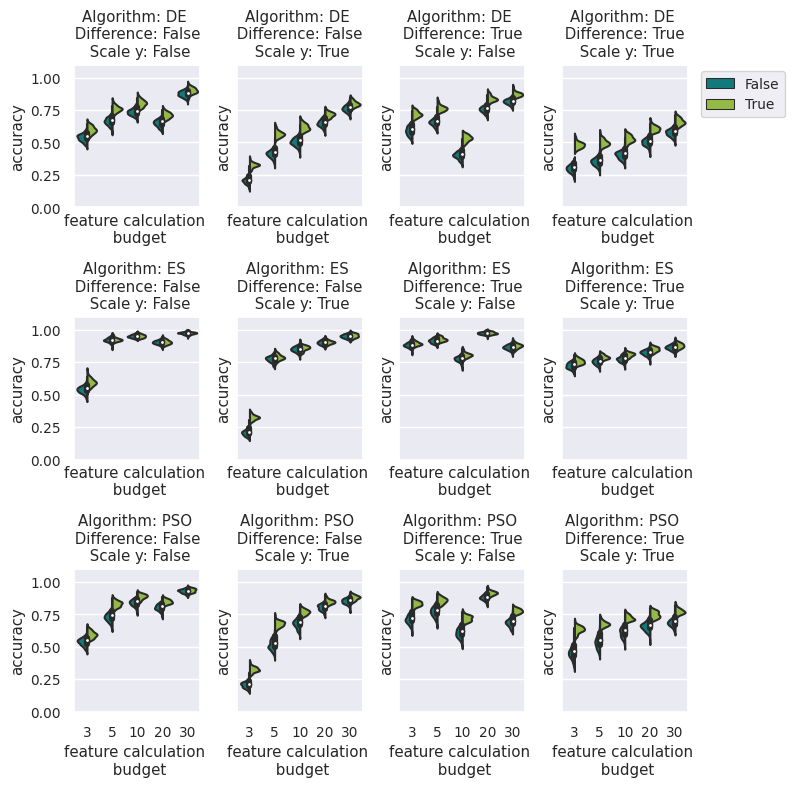

     accuracy  train_seed  test_seed  fold  feature calculation \n budget  \
0    0.675000         200        200     0                              1   
1    0.691667         200        200     1                              1   
2    0.662500         200        200     2                              1   
3    0.654167         200        200     3                              1   
4    0.666667         200        200     4                              1   
..        ...         ...        ...   ...                            ...   
245  0.837500        1000       1000     5                             30   
246  0.887500        1000       1000     6                             30   
247  0.906250        1000       1000     7                             30   
248  0.872611        1000       1000     8                             30   
249  0.893333        1000       1000     9                             30   

    algorithm  dimension  difference  normalize_y  
0          DE          

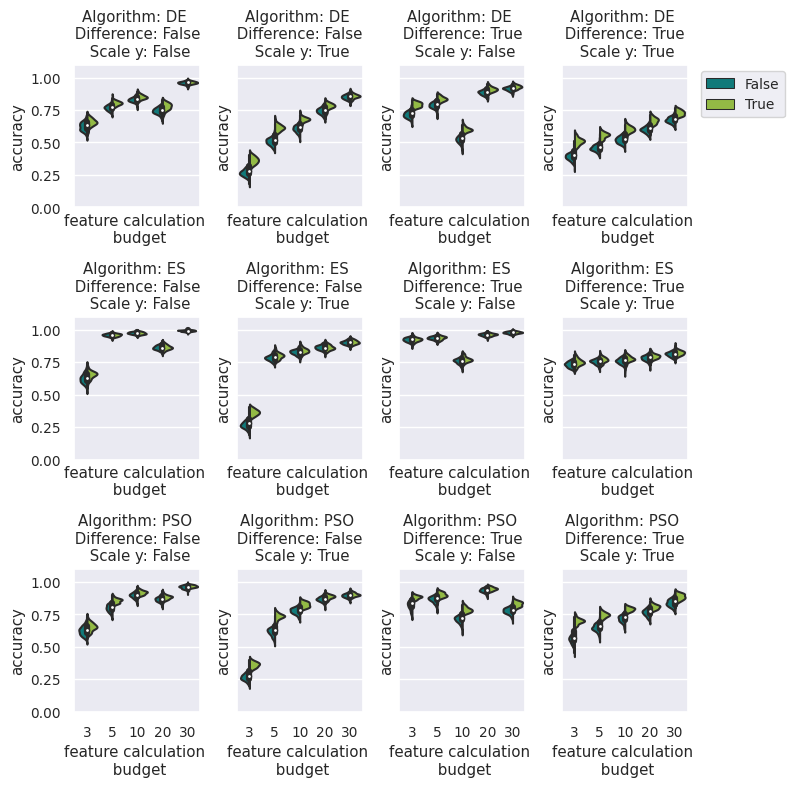

     accuracy  train_seed  test_seed  fold  feature calculation \n budget  \
0    0.745833         200        200     0                              1   
1    0.741667         200        200     1                              1   
2    0.795833         200        200     2                              1   
3    0.775000         200        200     3                              1   
4    0.733333         200        200     4                              1   
..        ...         ...        ...   ...                            ...   
245  0.841667        1000       1000     5                             30   
246  0.862500        1000       1000     6                             30   
247  0.862500        1000       1000     7                             30   
248  0.900000        1000       1000     8                             30   
249  0.891667        1000       1000     9                             30   

    algorithm  dimension  difference  normalize_y  
0          DE         1

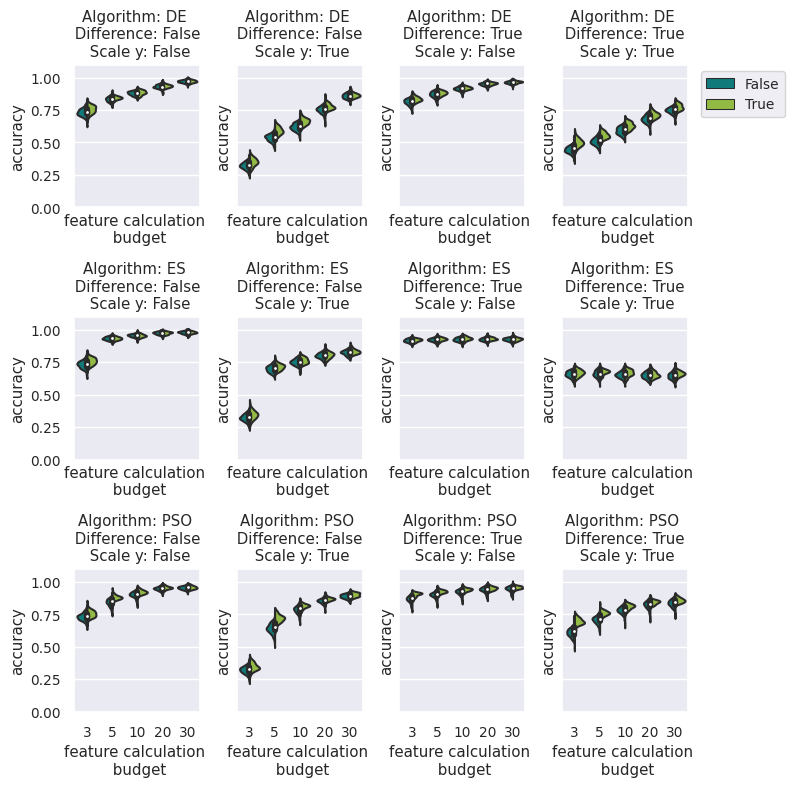

     accuracy  train_seed  test_seed  fold  feature calculation \n budget  \
0    0.845833         200        200     0                              1   
1    0.837500         200        200     1                              1   
2    0.904167         200        200     2                              1   
3    0.850000         200        200     3                              1   
4    0.820833         200        200     4                              1   
..        ...         ...        ...   ...                            ...   
245  0.862500        1000       1000     5                             30   
246  0.895833        1000       1000     6                             30   
247  0.858333        1000       1000     7                             30   
248  0.875000        1000       1000     8                             30   
249  0.887500        1000       1000     9                             30   

    algorithm  dimension  difference  normalize_y  
0          DE         2

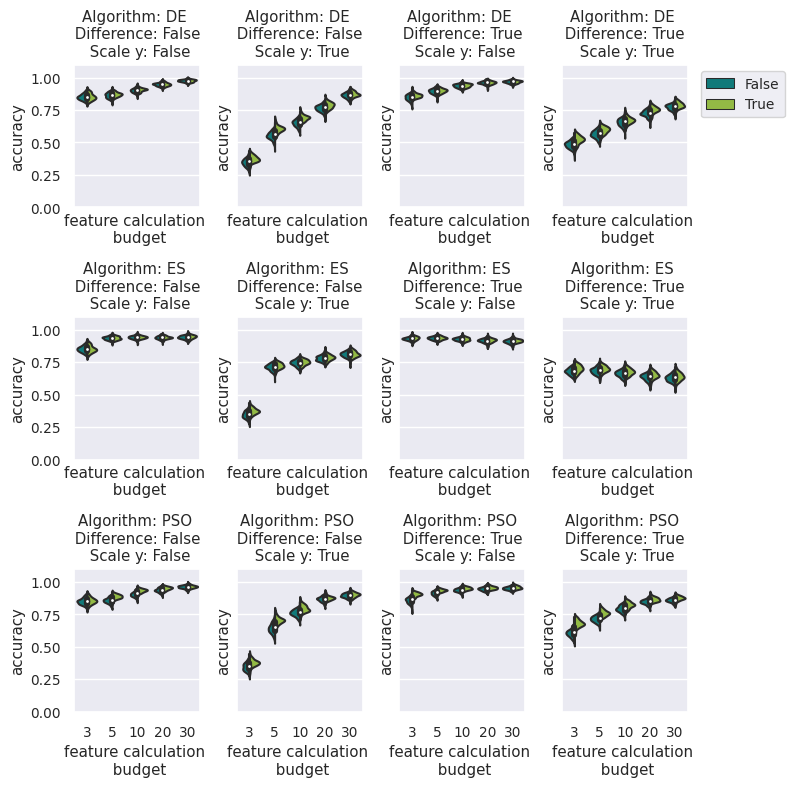

In [58]:
results_per_iteration=[]
sns.set(font_scale=0.9)
all_algorithms=['DE','ES','PSO']
for dimension in [3,5,10,20]:
    all_accuracies=pd.DataFrame()
    for algorithm in all_algorithms:
        for train_on_seed in [True]:
            for difference in [False,True]:
                for end_iteration in [0,2,4,9,19,29]:
                    for normalize_y in [False, True]:
                        if difference==True and end_iteration==0:
                            continue
                        seed_accuracy_df,_ = get_seed_accuracies_df(dimension,algorithm, 0, end_iteration, train_on_seed, difference,seeds, stat=None,normalize_y=normalize_y)
                        seed_accuracy_df['feature calculation \n budget']=end_iteration+1
                        seed_accuracy_df['algorithm']=algorithm
                        seed_accuracy_df['dimension']=dimension
                        seed_accuracy_df['difference']=difference
                        seed_accuracy_df['normalize_y']=normalize_y
                        all_accuracies=pd.concat([all_accuracies,seed_accuracy_df])

    all_accuracies['Train seed=Test seed']=all_accuracies.apply(lambda row: row['train_seed']==row['test_seed'], axis=1)
    all_accuracies.to_csv(f'{visualizations_dir}/accuracies_dim_{dimension}.csv')
    fig, axes = plt.subplots(3,4, figsize=(8,8), sharex=True, sharey=True)
    for algorithm_index, algorithm in enumerate(all_algorithms):
        for difference_index, difference in enumerate([False,True]):
            for normalize_index, normalize_y in enumerate([False, True]):
                algorithm_accuracies=all_accuracies.query('algorithm==@algorithm and difference==@difference and normalize_y==@normalize_y')
                ax=axes[algorithm_index][normalize_index+difference_index*2] if type(axes) is np.ndarray else axes
                ax.set_title(f'Algorithm: {algorithm} \n Difference: {difference} \n Scale y: {normalize_y}')
                sns.violinplot(data=algorithm_accuracies, x="feature calculation \n budget", y="accuracy", hue='Train seed=Test seed', split=True, palette=color_palette[1:3], ax=ax)
                ax.set_ylim(bottom=0, top=1.1)
                if algorithm_index==0 and normalize_index==1 and difference_index==1:
                    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                else: 
                    ax.get_legend().remove()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    
    plt.savefig(os.path.join(visualizations_dir,f'dim_{dimension}_accuracies_all_algorithms_diff.pdf'))
    plt.show()

0       std
300     max
400    mean
Name: statistic, dtype: object
0     mean
50     std
Name: statistic, dtype: object
0       max
50      std
150    mean
Name: statistic, dtype: object
0       max
50      std
100    mean
Name: statistic, dtype: object
0      mean
150     std
Name: statistic, dtype: object
0      mean
150     std
Name: statistic, dtype: object


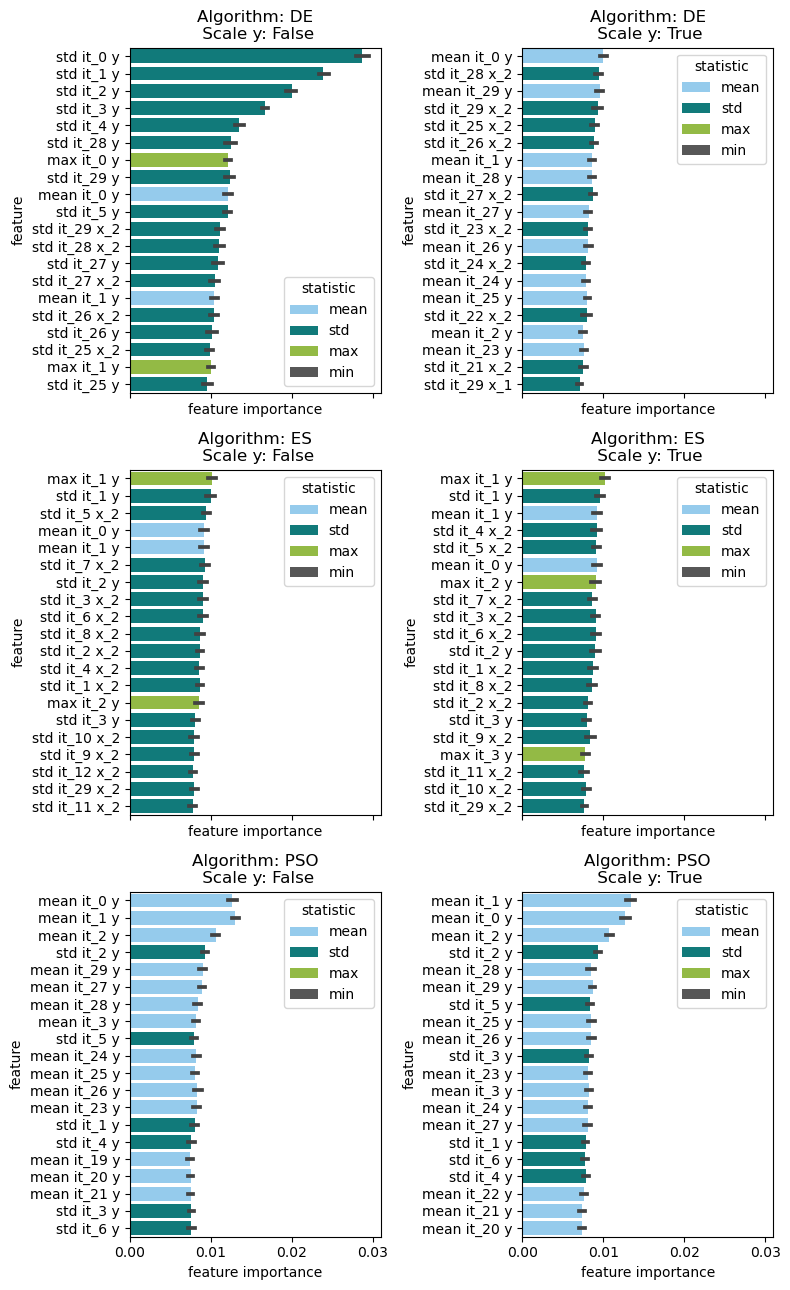

0    std
Name: statistic, dtype: object
0       std
50     mean
400     min
Name: statistic, dtype: object
0    std
Name: statistic, dtype: object
0       max
50     mean
350     std
Name: statistic, dtype: object
0      mean
300     std
600     max
Name: statistic, dtype: object
0      mean
250     min
350     std
Name: statistic, dtype: object


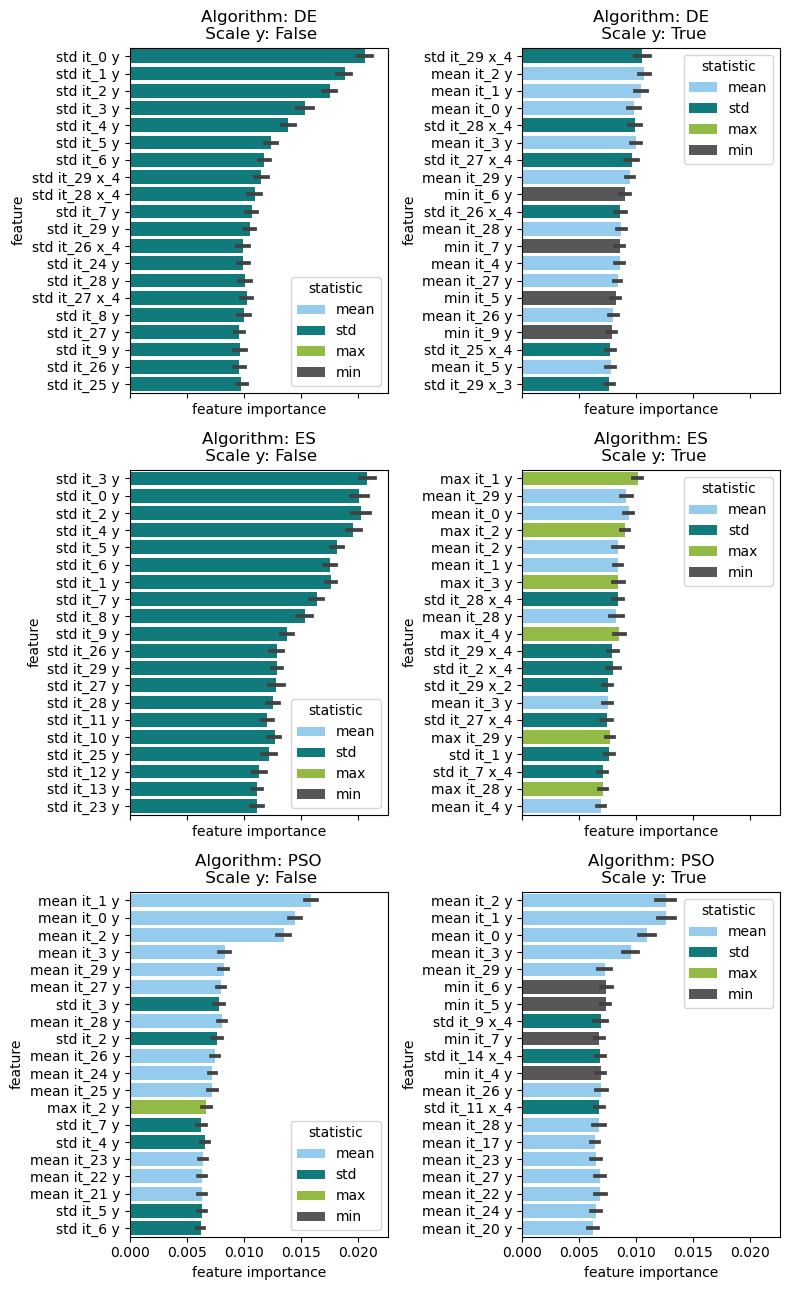

0    std
Name: statistic, dtype: object
0    mean
Name: statistic, dtype: object
0    std
Name: statistic, dtype: object
0      mean
50      max
550     min
850     std
Name: statistic, dtype: object
0      std
750    max
Name: statistic, dtype: object
0      mean
150     max
250     std
400     min
Name: statistic, dtype: object


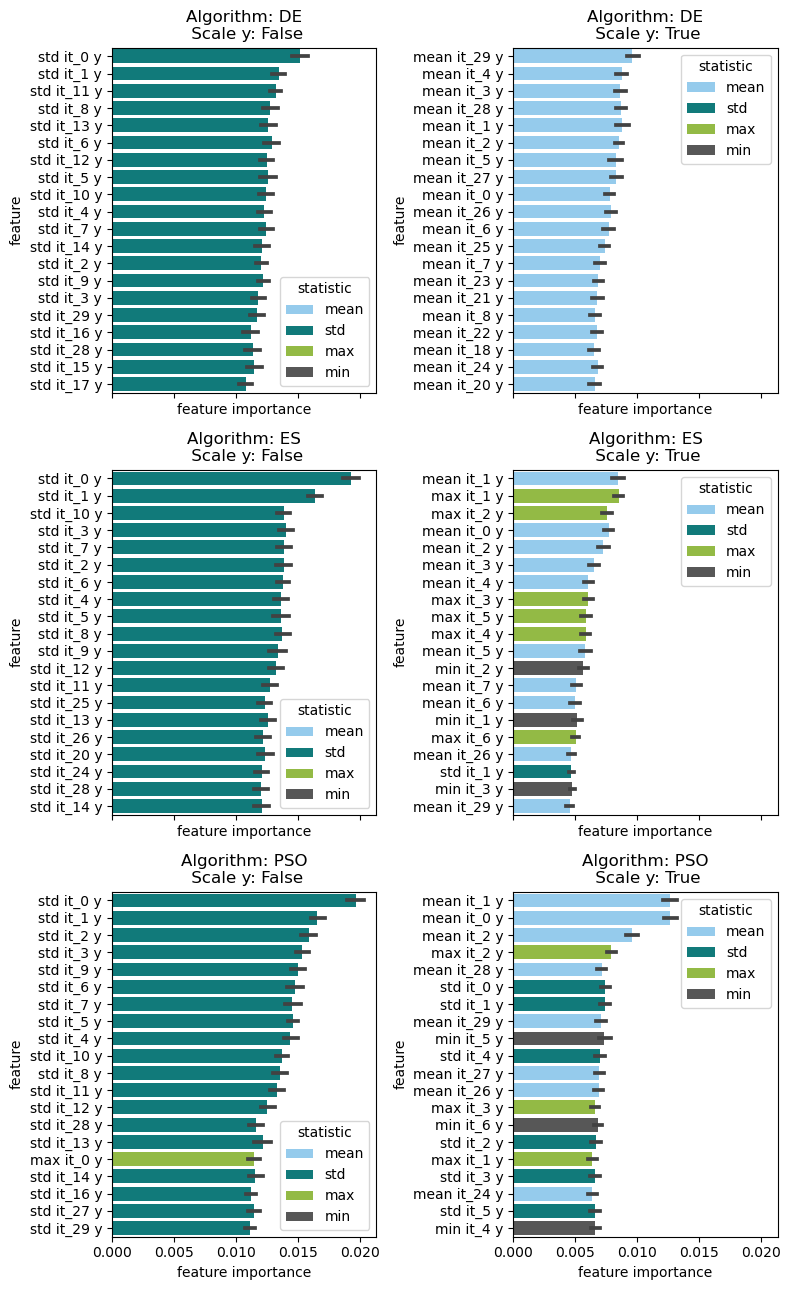

0    std
Name: statistic, dtype: object
0    mean
Name: statistic, dtype: object
0    std
Name: statistic, dtype: object
0      mean
50      max
450     std
650     min
Name: statistic, dtype: object
0    std
Name: statistic, dtype: object
0      mean
150     min
300     std
400     max
Name: statistic, dtype: object


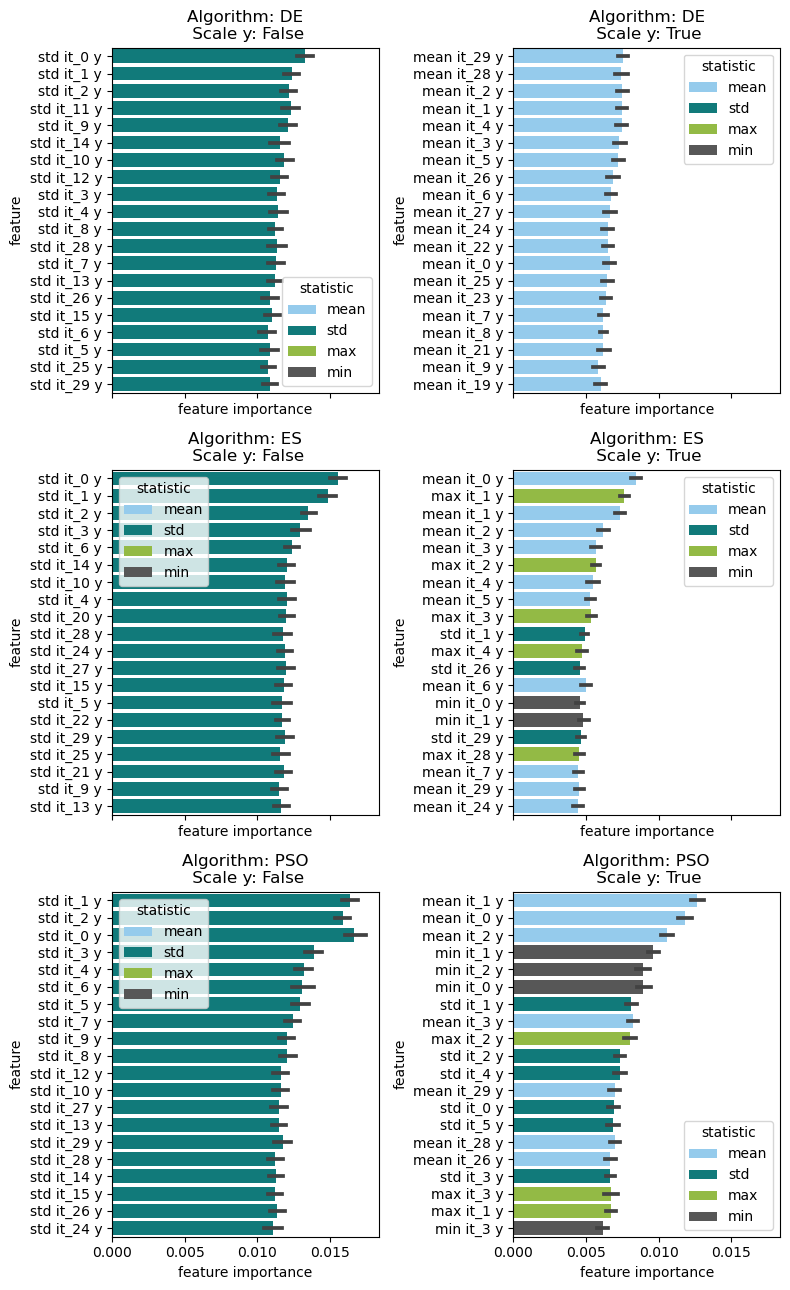

In [40]:

for dimension in [3,5,10,20]:
    for end_iteration in [29]:
        fig, axes = plt.subplots(len(all_algorithms),2, figsize=(8,13), sharex=True)
        for algorithm_index, algorithm in enumerate(all_algorithms):
            for normalize_index, normalize_y in enumerate([False,True]):
                all_feature_importances_df=pd.DataFrame()
                for seed in seeds:
                    for train_on_seed_1 in [True]:
                        for difference_1 in [False]:

                             for fold in range(0,10):

                                global_file_name=get_global_file_name(dimension,algorithm, 0, end_iteration, train_on_seed,seed, difference, stat=None, normalize_y=normalize_y)
                                file_location=global_file_name+f'_fold_{fold}_feature_importance.csv'

                                if not os.path.isfile(file_location):
                                    print('Not found', file_location)
                                    continue
                                #print(file_location)
                                fold_importance_df=pd.read_csv(file_location, index_col=[0], compression='zip')
                                fold_importance_df['seed']=seed
                                fold_importance_df['fold']=fold
                                fold_importance_df['algorithm']=algorithm
                                fold_importance_df['budget']=end_iteration+1
                                fold_importance_df['normalize_y']=normalize_y
                                all_feature_importances_df=pd.concat([all_feature_importances_df, fold_importance_df])

                ax=axes[algorithm_index, normalize_index] if type(axes) is np.ndarray else axes
                ax.set_title(f'Algorithm: {algorithm}\n Scale y: {normalize_y}')
                id_vars=['algorithm','seed','fold','budget','normalize_y']
                top_features=list(all_feature_importances_df.drop(columns=id_vars).median().sort_values(ascending=False).head(20).index)
                all_feature_importances_df_melted=pd.melt(all_feature_importances_df[top_features+id_vars], id_vars=id_vars, value_vars=top_features)
                all_feature_importances_df_melted['statistic']=all_feature_importances_df_melted['variable'].apply(lambda x: x.split(' ')[0])

                sns.barplot(all_feature_importances_df_melted, y='variable',x='value',hue='statistic',palette=[light_blue,dark_cyan,lime, grey], ax=ax,dodge=False, hue_order=['mean','std','max','min'])
                ax.set_xlabel('feature importance')
                ax.set_ylabel('feature')
        plt.tight_layout()

        plt.savefig(os.path.join(visualizations_dir,'importance_per_algorithm',f'dim_{dimension}_top_20_feature_importance_budget_{end_iteration+1}.pdf'))
        plt.show()

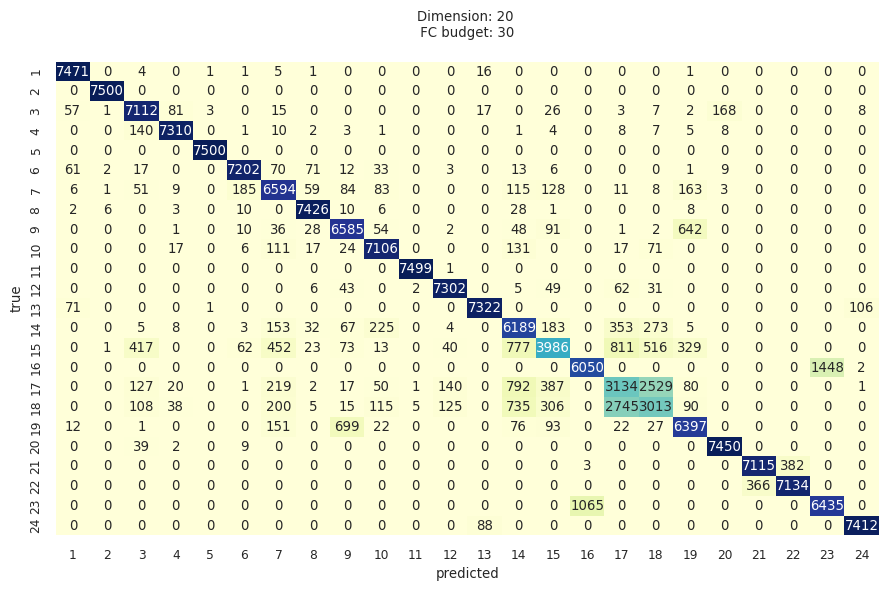

In [15]:
results_per_iteration=[]

all_dimensions=[20]
difference=False
train_on_seed=True
end_iterations=[29]
problem_ids=[i for i in range(1,25)]
sns.set(font_scale=0.8)

for dimension_index, dimension in enumerate(all_dimensions):
    predictions=pd.DataFrame()
    fig, axes = plt.subplots(1,1, figsize=(9,6), squeeze=False, sharex=True, sharey=True)

    
    for algorithm_index, algorithm in enumerate(['DE','ES','PSO']):
        for end_iteration_index, end_iteration in enumerate(end_iterations):
            for normalize_y_index, normalize_y in enumerate([True]):
                _,p = get_seed_accuracies_df(dimension,algorithm, 0, end_iteration, train_on_seed, difference, seeds, normalize_y=normalize_y)
                predictions=pd.concat([predictions,p])
    ax=axes[0][0]
    ax.set_title(f'Dimension: {dimension} \n FC budget: {end_iteration + 1} \n')
    #d=ConfusionMatrixDisplay.from_predictions(predictions['y'],predictions['preds'],cmap=my_cmap, colorbar=True,ax=ax)

    c=confusion_matrix(predictions['y'],predictions['preds'])

    sns.heatmap(pd.DataFrame(c, index=problem_ids, columns=problem_ids),cmap='YlGnBu', ax=ax, annot=True, cbar=False, fmt='.0f')
    ax.set_xlabel("predicted")
    ax.set_ylabel("true") 
    rows=[f'Dimension: {d}' for d in all_dimensions]      
    #for ax, row in zip(axes[:,0], rows):
    #    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),xycoords=ax.yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation= 90)


    #plt.xticks(rotation=90)

    plt.tight_layout()
    plt.savefig(os.path.join(visualizations_dir,f'confusion_matrices_per_iteration_{"train" if train_on_seed else "test"}_on_seed{"_differenced" if difference else ""}_dim_{dimension}_all_algorithms.pdf'))
    plt.show()

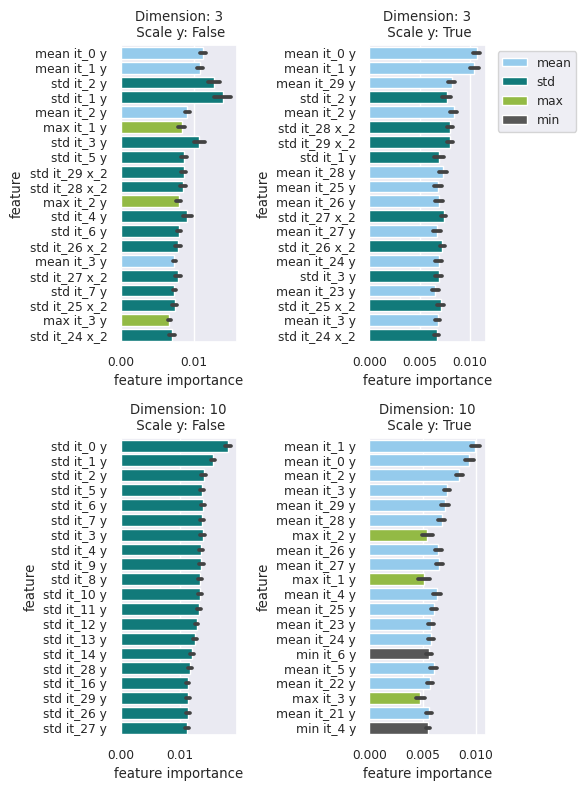

In [18]:
fig, axes = plt.subplots(2,2, figsize=(6,8))
dimensions=[3,10]
for dimension_index,dimension in enumerate(dimensions):
    for end_iteration in [29]:
        
        for normalize_index, normalize_y in enumerate([False,True]):
            all_feature_importances_df=pd.DataFrame()
            for algorithm_index, algorithm in enumerate(all_algorithms):
            
                for seed in seeds:
                    for train_on_seed in [True]:
                        for difference in [False]:

                             for fold in range(0,10):

                                global_file_name=get_global_file_name(dimension,algorithm, 0, end_iteration, train_on_seed,seed, difference, stat=None, normalize_y=normalize_y)
                                file_location=global_file_name+f'_fold_{fold}_feature_importance.csv'

                                if not os.path.isfile(file_location):
                                    print('Not found', file_location)
                                    continue
                                #print(file_location)
                                fold_importance_df=pd.read_csv(file_location, index_col=[0], compression='zip')
                                fold_importance_df['seed']=seed
                                fold_importance_df['fold']=fold
                                fold_importance_df['algorithm']=algorithm
                                fold_importance_df['budget']=end_iteration+1
                                fold_importance_df['normalize_y']=normalize_y
                                all_feature_importances_df=pd.concat([all_feature_importances_df, fold_importance_df])

            ax=axes[dimension_index, normalize_index] if type(axes) is np.ndarray else axes
            ax.set_title(f'Dimension: {dimension}\n Scale y: {normalize_y}')
            id_vars=['algorithm','seed','fold','budget','normalize_y']
            top_features=list(all_feature_importances_df.drop(columns=id_vars).median().sort_values(ascending=False).head(20).index)


            all_feature_importances_df_melted=pd.melt(all_feature_importances_df[top_features+id_vars], id_vars=id_vars, value_vars=top_features)
            all_feature_importances_df_melted['statistic']=all_feature_importances_df_melted['variable'].apply(lambda x: x.split(' ')[0])
                
            sns.barplot(all_feature_importances_df_melted, y='variable',x='value',hue='statistic',palette=[light_blue,dark_cyan,lime, grey], ax=ax,dodge=False, hue_order=['mean','std','max','min'])
            
            if dimension_index==0 and normalize_index==1:
                ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            else: 
                ax.get_legend().remove()

            ax.set_xlabel('feature importance')
            ax.set_ylabel('feature')
plt.tight_layout()

plt.savefig(os.path.join(visualizations_dir,f'top_20_feature_importance_all_dimensions_all_algorithms_budget_{end_iteration+1}_dim_{"_".join([str(d) for d in dimensions])}.pdf'))
plt.show()

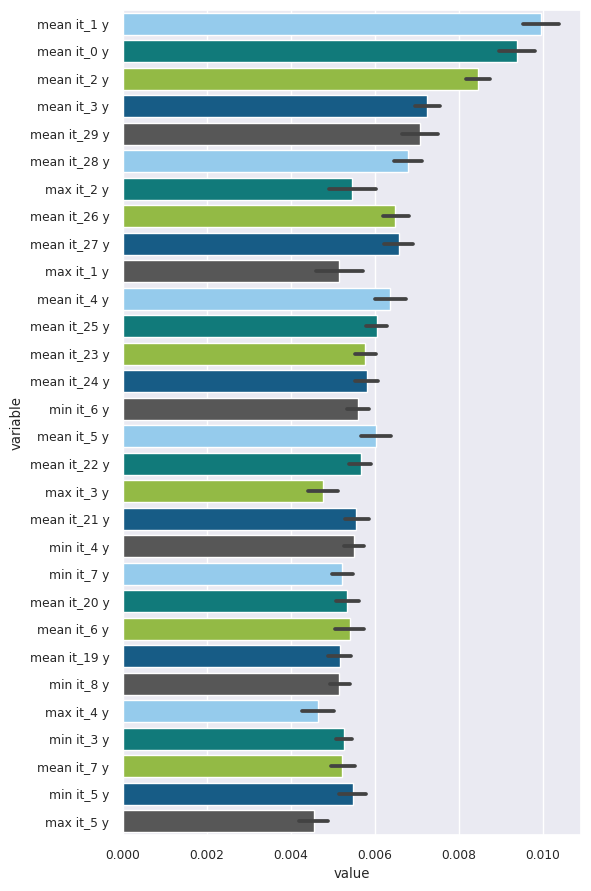

In [21]:
id_vars=['algorithm','seed','fold']
top_30_features=list(all_feature_importances_df.drop(columns=id_vars+['budget','normalize_y']).median().sort_values(ascending=False).head(30).index)


all_feature_importances_df_melted=pd.melt(all_feature_importances_df[top_30_features+id_vars], id_vars=id_vars, value_vars=top_30_features)
plt.figure(figsize=(6,9))

sns.barplot(all_feature_importances_df_melted, y='variable',x='value',palette=color_palette)
plt.tight_layout()
plt.savefig(os.path.join(visualizations_dir,'top_30_feature_importance.pdf'))